## 과제: 로지스틱 회귀를 사용한 분류 문제

### 목표

로지스틱 회귀(Logistic Regression)를 사용하여 분류 문제를 해결합니다.
Iris 데이터셋을 활용하여 Iris Virginica 품종을 분류하는 모델을 구현합니다.

1. 데이터 준비

In [1]:
# 패키지 로드
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 데이터 로드
iris = load_iris()

In [3]:
# 주요 정보 출력
print("특징(feature)의 이름:", iris.feature_names)
print("타깃(target)의 이름:", iris.target_names)
print("데이터의 크기:", iris.data.shape)

특징(feature)의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타깃(target)의 이름: ['setosa' 'versicolor' 'virginica']
데이터의 크기: (150, 4)


이전의 연습단계에서는 꽃잎 너비만 사용했으나, 해당 Task에서는 전체 데이터 사용한 모델도 구축함

In [4]:
# 타깃 데이터 이진화
iris.target = np.where(iris.target == 2, 1, 0)

2. 데이터 분할

In [5]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [6]:
# 훈련 세트와 테스트 세트 크기 출력
print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (120, 4)
테스트 세트 크기: (30, 4)


3. 모델 학습 / 예측 및 평가

In [7]:
# Logistic Regression 모델 정의
model = LogisticRegression()

In [8]:
# 모델 학습
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

In [10]:
# 모델의 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델의 정확도:", accuracy)

모델의 정확도: 1.0


4. 결정 경계 시각화

In [19]:
# 꽃잎 너비(petal width) 값 사용
iris = load_iris()
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica 여부

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 꽃잎 너비만 사용하는 모델 학습
petal_width_model = LogisticRegression()
petal_width_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_pw = petal_width_model.predict(X_test)
accuracy_pw = accuracy_score(y_test, y_pred_pw)
print("꽃잎 너비 모델의 정확도:", accuracy_pw)

꽃잎 너비 모델의 정확도: 1.0


In [20]:
# 결정 경계 시각화
X_plot = np.linspace(0, 3, 1000).reshape(-1, 1)
probs_pw = petal_width_model.predict_proba(X_plot)[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


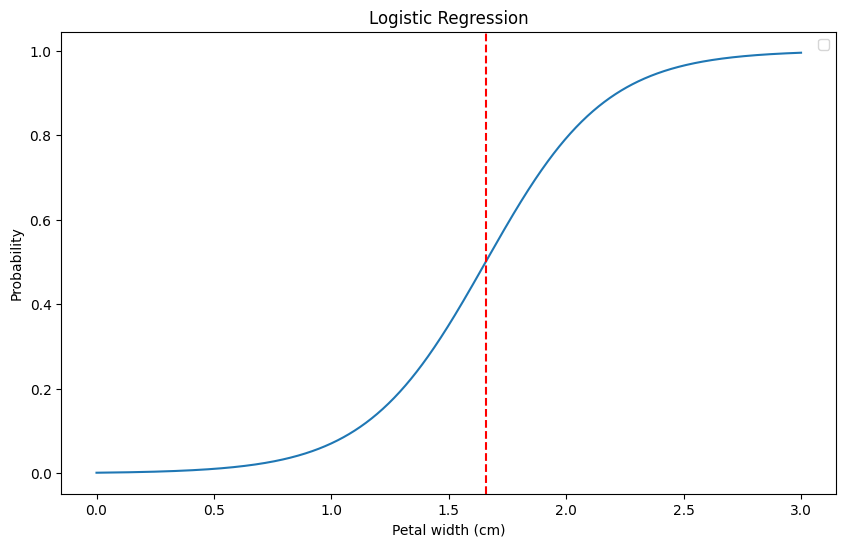

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(X_plot, probs_pw)
plt.axvline(x=X_plot[np.argmax(probs_pw >= 0.5)], color='red', linestyle='--')
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression")
plt.legend()
plt.show()